In [1]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [21]:
def load_file():
    
    df = pd.read_excel('external_regressors.xlsx')
    df.head()
    df.reset_index(drop=True)
    df = df.set_index('Date')
    df.columns = df.columns.str.replace(' ', '_')
    cols = df.columns
    
    return df

In [9]:
def load_file_real():
    
    df = pd.read_excel('External_regressors_Auto.xlsx')
    df.head()
    df.reset_index(drop=True)
    df = df.set_index('Date')
    df.columns = df.columns.str.replace(' ', '_')
    cols = df.columns
    
    return df

In [32]:
def fit_ucm(train):
    model = sm.tsa.UnobservedComponents(train, trend=True )
    ucm_fit = model.fit()
    print(ucm_fit.summary())
    ucm_fit.plot_diagnostics()
    train_pred = ucm_fit.predict(start=0, end=26)
    test_pred = ucm_fit.predict(start=27, end=33)
    return train_pred, test_pred

In [5]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [6]:
def metrics(y_test, test_pred):
    
    MSE =mean_squared_error(y_true=y_test, y_pred=test_pred)                
    MAE = mean_absolute_error(y_true=y_test, y_pred=test_pred)
    MAPE = mean_absolute_percentage_error(y_test, test_pred)

    return MSE, MAE, MAPE

In [29]:
def create_data_frame(df4, train, test, train_pred,train_mape, test_pred,test_mape, forecast_item):
    df3 = pd.DataFrame()
    df3 = pd.concat([df3,df4])
    df3['Date'] = df1.index
    df3['Forecast_key'] = forecast_item
    df3['train'] = train
    df3['pred_train'] = train_pred 
    df3['train_mape'] = train_mape
    df3['test'] = test
    df3['Pred_test'] = test_pred
    df3['test_mape'] = test_mape
    
    return df3

In [8]:
df = load_file()
#Extract the unique codes for filtering the over all data    
forecast_group = df.groupby('Forecast_key', as_index=False)
forecast_list = forecast_group.groups.keys()

C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:481: SpecificationWarning: Trend component specified without level component; deterministic level component added.
  " deterministic level component added.", SpecificationWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:494: SpecificationWarning: Specified model does not contain a stochastic element; irregular component added.
  " irregular component added.", SpecificationWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:481: SpecificationWarning: Trend component specified without level component; dete

                         Unobserved Components Results                         
Dep. Variable:       10_years_Treasury   No. Observations:                   27
Model:             deterministic trend   Log Likelihood                  -2.096
Date:                 Wed, 04 Dec 2019   AIC                              6.193
Time:                         14:41:12   BIC                              7.412
Sample:                     01-01-2017   HQIC                             6.531
                          - 03-01-2019                                         
Covariance Type:                   opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0451      0.014      3.178      0.001       0.017       0.073
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.57
Prob(Q):             

C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:481: SpecificationWarning: Trend component specified without level component; deterministic level component added.
  " deterministic level component added.", SpecificationWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:494: SpecificationWarning: Specified model does not contain a stochastic element; irregular component added.
  " irregular component added.", SpecificationWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:481: SpecificationWarning: Trend component specified without level component; dete

------forecast_item------ 30_year_Interest_rate_Mortgage
train 0.6970283172739271 0.3464631538891314 8.113325002426752
test 0.951415745236707 0.9434391724963296 25.120313297632137
                           Unobserved Components Results                            
Dep. Variable:     EMPL_non_farm_Employment   No. Observations:                   27
Model:                  deterministic trend   Log Likelihood                -169.105
Date:                      Wed, 04 Dec 2019   AIC                            340.211
Time:                              14:41:13   BIC                            341.429
Sample:                          01-01-2017   HQIC                           340.549
                               - 03-01-2019                                         
Covariance Type:                        opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:481: SpecificationWarning: Trend component specified without level component; deterministic level component added.
  " deterministic level component added.", SpecificationWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:494: SpecificationWarning: Specified model does not contain a stochastic element; irregular component added.
  " irregular component added.", SpecificationWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:481: SpecificationWarning: Trend component specified without level component; dete

                         Unobserved Components Results                          
Dep. Variable:     arm_adjustable_rates   No. Observations:                   27
Model:              deterministic trend   Log Likelihood                   8.725
Date:                  Wed, 04 Dec 2019   AIC                            -15.450
Time:                          14:41:13   BIC                            -14.231
Sample:                      01-01-2017   HQIC                           -15.112
                           - 03-01-2019                                         
Covariance Type:                    opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0190      0.007      2.624      0.009       0.005       0.033
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 4.01
Prob(Q):     

C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:481: SpecificationWarning: Trend component specified without level component; deterministic level component added.
  " deterministic level component added.", SpecificationWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:494: SpecificationWarning: Specified model does not contain a stochastic element; irregular component added.
  " irregular component added.", SpecificationWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:481: SpecificationWarning: Trend component specified without level component; dete

------forecast_item------ armrate
train 0.6599091509105547 0.22263563838855902 5.354563147148126
test 0.004871833220019996 0.0632173369324215 1.6007611131231954
                         Unobserved Components Results                         
Dep. Variable:     population_Millions   No. Observations:                   27
Model:             deterministic trend   Log Likelihood                  40.326
Date:                 Wed, 04 Dec 2019   AIC                            -78.653
Time:                         14:41:13   BIC                            -77.434
Sample:                     01-01-2017   HQIC                           -78.315
                          - 03-01-2019                                         
Covariance Type:                   opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0015  

C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:481: SpecificationWarning: Trend component specified without level component; deterministic level component added.
  " deterministic level component added.", SpecificationWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:494: SpecificationWarning: Specified model does not contain a stochastic element; irregular component added.
  " irregular component added.", SpecificationWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\structural.py:481: SpecificationWarning: Trend component specified without level component; dete

                         Unobserved Components Results                         
Dep. Variable:        unemploymet_rate   No. Observations:                   27
Model:             deterministic trend   Log Likelihood                  12.732
Date:                 Wed, 04 Dec 2019   AIC                            -23.464
Time:                         14:41:13   BIC                            -22.245
Sample:                     01-01-2017   HQIC                           -23.126
                          - 03-01-2019                                         
Covariance Type:                   opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0138      0.003      4.250      0.000       0.007       0.020
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 1.86
Prob(Q):             

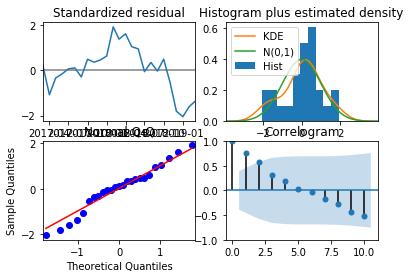

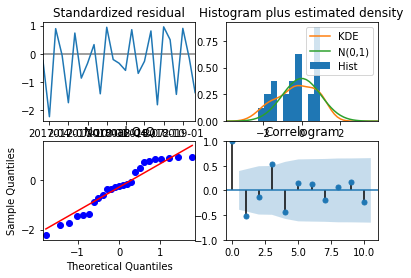

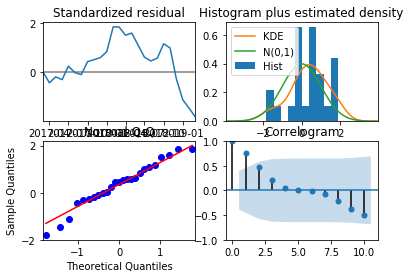

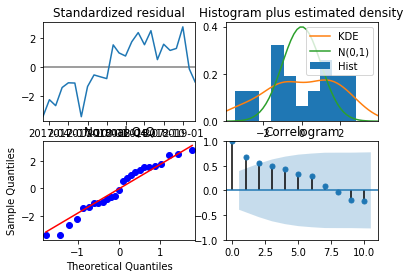

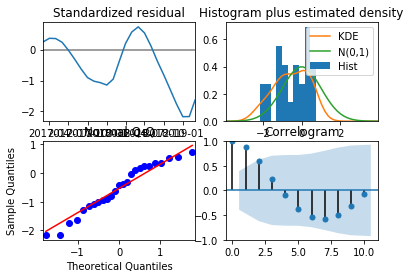

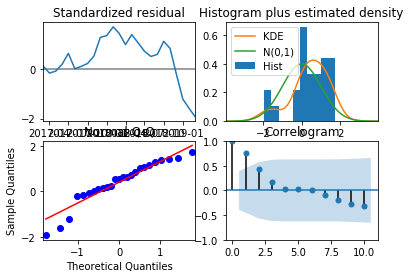

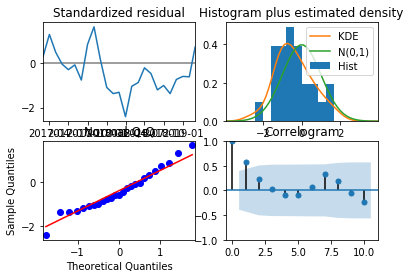

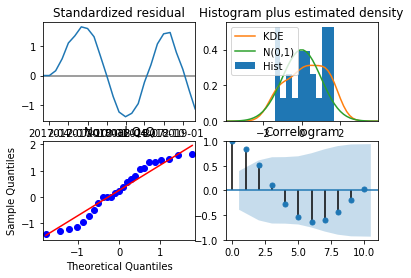

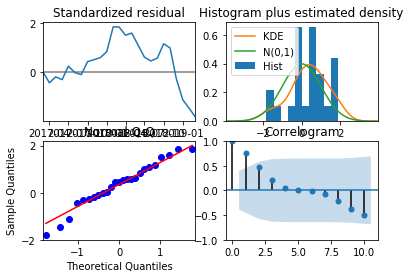

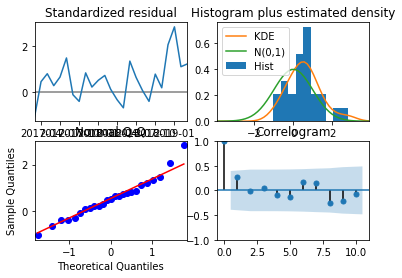

In [33]:
df2 = pd.DataFrame()
for forecast_item in forecast_list:
    df1 = df[df['Forecast_key'].isin ([forecast_item])]
    df1=df1.sort_index()
    df3 = load_file()

    df4 = df3[forecast_item]
    #df3.drop([forecast_item], axis =1, inplace = True)
    
    #X_train, X_test = df3[:27], df3[27:34]
    train, test = df4[:27], df4[27:34]

    train_pred, test_pred = fit_ucm(train)

    train_mse, train_mae, train_mape = metrics(train, train_pred)
    test_mse, test_mae, test_mape = metrics(test, test_pred)
    print('------forecast_item------', forecast_item)
    print('train',train_mse, train_mae, train_mape )
    print('test',test_mse, test_mae, test_mape )
    df3 = create_data_frame(df4, train, test, train_pred,train_mape, test_pred,test_mape,forecast_item )
    df2 = pd.concat([df2,df3], ignore_index = True)


In [36]:
df2.tail(50)

,0,Date,Forecast_key,train,pred_train,train_mape,test,Pred_test,test_mape
290,4.53,2018-07-01,r-mortg,4.53,4.376471,8.113325,NaN,NaN,25.120313
291,4.55,2018-08-01,r-mortg,4.55,4.434737,8.113325,NaN,NaN,25.120313
292,4.63,2018-09-01,r-mortg,4.63,4.486158,8.113325,NaN,NaN,25.120313
293,4.83,2018-10-01,r-mortg,4.83,4.543571,8.113325,NaN,NaN,25.120313
294,4.87,2018-11-01,r-mortg,4.87,4.627532,8.113325,NaN,NaN,25.120313
295,4.64,2018-12-01,r-mortg,4.64,4.704980,8.113325,NaN,NaN,25.120313
296,4.46,2019-01-01,r-mortg,4.46,4.732065,8.113325,NaN,NaN,25.120313
297,4.37,2019-02-01,r-mortg,4.37,4.725800,8.113325,NaN,NaN,25.120313
298,4.27,2019-03-01,r-mortg,4.27,4.705815,8.113325,NaN,NaN,25.120313
299,4.14,2019-04-01,r-mortg,NaN,NaN,8.113325,4.14,4.672963,25.120313


In [37]:
df2.to_csv('UCM_predictions.csv',index = False)